Q1. Can you write you own Hopfield network model that works more or less like the one simulated above? (20 points)

Q2. Run the model with different parameters to figure out how the model's capacity to retrieve the correct pattern in response to a cue deteriorates as a function of 
(a) the informativeness of the cue
(b) the number of other patterns stored in the network
(c) the size of the network

Present your answers with plots and/or math. (20 points)

Q3. Can you write a function that converts MNIST digit [data](https://gitlab.com/datapythonista/mnist) to the sort of patterns used in this simulation? (20 points)

Q4. Can you write an MNIST classifier using the Hopfield network?. Can you characterize its performance using F-score, and compare with [classical](https://github.com/ksopyla/svm_mnist_digit_classification) and [deep](https://github.com/hwalsuklee/tensorflow-mnist-cnn) supervised learning methods? Remember that you can always use multiple samples of the same digit even for the Hopfield network classifier. Summarize your sense of the merits and demerits of using a Hopfield network as a classifier (40 points) 

In [1]:
!pip install neurodynex3
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools
from numpy.core.fromnumeric import argmax


!pip install mnist 
import mnist

import numpy as np
from numpy import linalg as lin
from copy import deepcopy
import random
import matplotlib.pyplot as plt

#for accuracy and f1 score of hopfield network
from scipy.ndimage import interpolation
from sklearn.metrics import *


#Q1


In [2]:
#creates the number of pattern for given size 
def get_pattern(size, no_pattern):
    plist = np.zeros([no_pattern,size,size])

    for i in range(no_pattern):
        for j in range(size):
            for k in range(size):
                if random.random() > 0.5:
                    plist[i][j][k] = 1
                else:
                    plist[i][j][k] = -1

    return plist

#petrub pattern - randomly flips the pattern
def perturb_pattern(pattern, number):
    size = len(pattern)
    pattern = pattern.flatten()
    random_list = random.sample(range(0, len(pattern)), number)
    for i in random_list:
        pattern[i] = pattern[i]*-1
    pattern = np.reshape(pattern, (size,size))
    return pattern

#calculating weights - trains the weights for hopfield network
def calculate_weights(plist, pattern_size):
    size = pattern_size**2
    wgt = np.zeros([size,size])
    for k in plist:
        state = k.flatten()
        temp = np.zeros([size,size])
        for i in range(size):
            for j in range(size):
                if i == j :
                    temp[i][j] = 0
                else: 
                    temp[i][j] = state[i]*state[j]
                    temp[j][i] = state[i]*state[j]
        wgt = wgt + temp
    #print(wgt)
    return wgt/size

#network evolution - takes a random pattern and converges to old pattern
def network_evolution(S,weights,t_steps):
    shape = S.shape
    temp = S.flatten()
    states = [S]
    for i in range(t_steps):
        temp = np.sign(np.sum(weights*temp, axis=1))
        states.append(temp.reshape(shape))
    temp = temp.reshape(shape)
    return temp,states

#overlap uses cosine similarites
def overlap_computation(plist,states):
    overlap = []
    size = len(plist[0])
    m = 0
    temp = states.flatten()
    for i in plist:
        temp2 = i.flatten()
        m = np.dot(temp,temp2)/lin.norm(temp)/lin.norm(temp2)
        overlap.append(m)
    return overlap

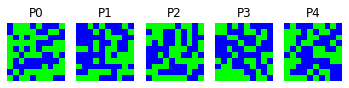

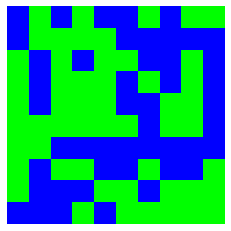

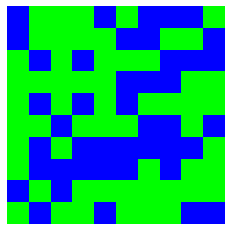

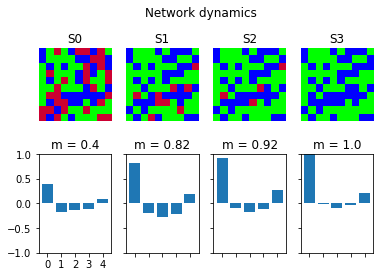

1.0


In [3]:
def hopfield_net(size=5,number_of_pattern=5,flips=4,steps=5):
    plist = get_pattern(size,number_of_pattern)
    plot_tools.plot_pattern_list(plist)
    
    a = deepcopy(plist[0])
    S = perturb_pattern(a,flips)
    
    #calculation of weights 
    wgt = calculate_weights(plist,size)
    k,states = network_evolution(S,wgt,steps)
    
    plot_tools.plot_pattern(S) #perturb pattern 
    plot_tools.plot_pattern(k) #retrive the pattern stored in network
    plot_tools.plot_state_sequence_and_overlap(states, plist, reference_idx=0, suptitle="Network dynamics")
    m = overlap_computation([plist[0]],k)[0]
    print(m)

hopfield_net(size=10,flips=30,steps=3)

#Q2

a) Infromativeness of the cue - As the no of flips increases i.e. noise in the pattern, the network ability to retrive the pattern decreases.

-Neurons = 10

-Flips ranges from 5 to 40

-10 iterations are used to reduce the randomness for each case

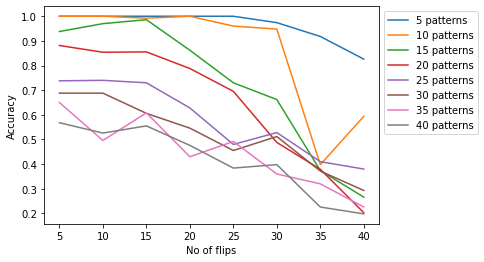

In [4]:
fig , ax  = plt.subplots(1)
for i in range(5,45,5):
    final_y = []
    final_x = []
    for j in range(5,45,5):
        sum = 0 
        for _ in range(10):
            plist = get_pattern(10,i)
            a = deepcopy(plist[0])
            S = perturb_pattern(a,j)
            wgt = calculate_weights(plist,10)
            k,states = network_evolution(S,wgt,5)
            m = overlap_computation([plist[0]],k)[0]
            sum = sum + m
        final_y.append(sum/10)
        final_x.append(j)
    ax.plot(final_x,final_y,label=str(i)+' patterns')

plt.xlabel('No of flips')
plt.ylabel('Accuracy')
ax.legend(bbox_to_anchor=(1,1))

b)Effect of number of patterns stored in network - 

The network ability to retrive the pattern decrease as the more number of patterns are stored in the network

Text(0, 0.5, 'Accuracy')

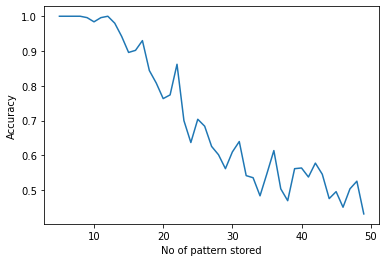

In [5]:
#number of patterns increased 
fig , ax  = plt.subplots(1)
final_y = []
final_x = []
for j in range(5,50):
    sum = 0 
    for _ in range(10):
        plist = get_pattern(10,j)
        a = deepcopy(plist[0])
        S = perturb_pattern(a,15)
        wgt = calculate_weights(plist,10)
        k,states = network_evolution(S,wgt,5)
        m = overlap_computation([plist[0]],k)[0]
        sum = sum + m
    final_y.append(sum/10)
    final_x.append(j)
ax.plot(final_x,final_y)


plt.xlabel('No of pattern stored')
plt.ylabel('Accuracy')

C) Effect of size of network-

 As the hopfield net size increases it can store the more number of patterns as we can see the accuracy to retrive pattern increase in hopfield net

Text(0, 0.5, 'Accuracy')

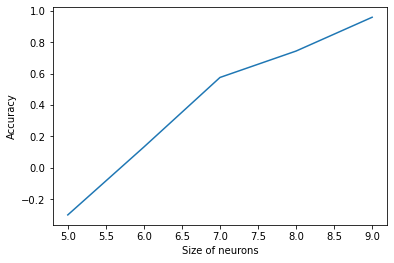

In [6]:
#increasing the the number of neurons the capacity to store images also increases
fig , ax  = plt.subplots(1)
final_y = []
final_x = []
for j in range(5,10):
    sum = 0 
    for _ in range(10):
        plist = get_pattern(j,10)
        a = deepcopy(plist[0])
        S = perturb_pattern(a,15)
        wgt = calculate_weights(plist,j)
        k,states = network_evolution(S,wgt,5)
        m = overlap_computation([plist[0]],k)[0]
        sum = sum + m
    final_y.append(sum/10)
    final_x.append(j)
ax.plot(final_x,final_y)

plt.xlabel('Size of neurons')
plt.ylabel('Accuracy')

#Q3 

Converting the mnist data set for training and testing 

The image preprocessing steps involves - i) Deskweing  ii) Cropping iii) Applying threshold 

Deskewing is used to straighten the images used. Cropping is used to remove the unwanted part and threshold to convert the grayscle to hopfield

In [7]:
#images for testing and training 
x_images = mnist.train_images().astype(int)
y_images = mnist.test_images().astype(int)
x_labels = mnist.train_labels()
y_labels = mnist.test_labels()

In [8]:
#return the number of images and labels required for training and testing of each class i.e from 0-9 digits
def mnist_data(x_labels,x_images,y_labels,y_images,test_number = 5,train_number=5):
    train_images = []
    train_labels = []
    test_images = []
    test_labels = []

    for i in range(0,10):
        a = np.where(x_labels==i)[0][:train_number] 
        train_labels.extend(x_labels[a])
        train_images.extend(x_images[a])
        b = np.where(y_labels==i)[0][:test_number]
        test_labels.extend(y_labels[b])
        test_images.extend(y_images[b])
    return train_labels,train_images,test_labels,test_images

train_labels,train_images,test_labels,test_images = mnist_data(x_labels,x_images,y_labels,y_images,test_number=10,train_number=4)

Source for [deskewing](https://fsix.github.io/mnist/Deskewing.html)

In [9]:
#source - https://fsix.github.io/mnist/Deskewing.html
#moment and deskew funtions are taken from the above source for deskewing the image

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)


In [10]:
#applying threshold and cropping the image for more accuracy 
def mnist_convert(x_images,threshold):
    a = []
    for i in range(len(x_images)):
        a.append(deskew(x_images[i]))
    a = np.array(a)
    a = a[:,7:21,7:21]
    a[a<threshold] = -1
    a[a>=threshold] = 1
    return a

#performing deskew in train and test images
x_deskew = mnist_convert(x_images,86)
y_deskew = mnist_convert(y_images,86)

#Q4


Classifier for mnist dataset

The mnsit dataset is trained with only 1 image per class to get the maximum accuracy

In [11]:
def classifer(test_images,train_images,steps,size):
    wgt = calculate_weights(train_images,size)
    y_pred = []
    for i in range(len(test_images)):
        k,states = network_evolution(test_images[i],wgt,steps)
        label = overlap_computation(train_images,k)
        index = argmax(label)
        y_pred.append(train_labels[index])    
    return y_pred

In [12]:
train_labels,train_images,test_labels,test_images = mnist_data(x_labels,x_deskew,y_labels,y_deskew,test_number=10000,train_number=1)
y_pred = classifer(test_images,train_images,steps=5,size =14)
print('accuracy - ',accuracy_score(test_labels, y_pred))
print('f score - ',f1_score(test_labels,y_pred,average= 'macro'))

accuracy -  0.4878
f score -  0.4726965779467257


The f-score of  accuracy is around ~48% which is far less than than the classical ML models and the deep learning models 

The accuracy of Classical ML model (SVM RBF) is around 98.52% and for deep learning models (CNN) is greater than 99% 


In [13]:
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       980
           1       0.82      0.93      0.87      1135
           2       0.23      0.36      0.28      1032
           3       0.63      0.33      0.43      1010
           4       0.29      0.06      0.10       982
           5       0.29      0.32      0.30       892
           6       0.91      0.59      0.72       958
           7       0.60      0.35      0.44      1028
           8       0.31      0.61      0.41       974
           9       0.40      0.38      0.39      1009

    accuracy                           0.49     10000
   macro avg       0.52      0.48      0.47     10000
weighted avg       0.52      0.49      0.48     10000



Hopfield is unsupervised learning model and converges to single pattern within few iterations

**Merits of Hopfield**

i) Less memory internsive
ii) Less training time 
iii) Easy to implement 

**Demerits of Hopfield**

i) Difficult to differentiate between similar pattern
ii) Cannot store large number of pattern
iii) Due to only 2 values stored +1/-1 there is loss of color.

Refrences - 

[SVM MNIST classification refrence](https://github.com/ksopyla/svm_mnist_digit_classification)

[Deep learning refrence](https://github.com/hwalsuklee/tensorflow-mnist-cnn)

'Belyaev, Maksim & Velichko, Andrei. (2020). Classification of handwritten digits using the Hopfield network.' [Research paper](https://www.researchgate.net/publication/341712078_Classification_of_handwritten_digits_using_the_Hopfield_network)